#Library and Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB 
#Stacking
from mlxtend.classifier import StackingClassifier

C:\Users\Anuj Bohra\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
train_df = pd.read_csv(r'C:\Users\Anuj Bohra\Desktop\Arogo\survey.csv')
print(train_df.shape)
print(train_df.info())

(1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 1

In [4]:
train_df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Data Cleaning

In [5]:
#missing data
total_missingdata = train_df.isnull().sum().sort_values(ascending=False)
print(total_missingdata)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64


In [6]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True) # not required

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Cleaning NaN

In [7]:
# Values instead of missing stuff (fillna())
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

#loop to fill all at onCe
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [8]:

gender = train_df['Gender'].unique()
print(gender)

male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           


#Function for making 3 categories
def genderClass(value):
    value = str(value).strip().lower() 
    if value in [x.lower() for x in male]:
        return "Male"
    elif value in [x.lower() for x in female]:
        return "Female"
    else:
        return "Trans"
    
# Dataset pae lagaana 
train_df['Gender'] = train_df['Gender'].apply(genderClass)
print(train_df['Gender'].unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
['Female' 'Male' 'Trans']


In [9]:
train_df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [10]:
train_df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [11]:
# #complete missing age with mean
# train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# # Fill with media() values < 18 and > 120
# s = pd.Series(train_df['Age'])
# s[s<18] = train_df['Age'].median()
# train_df['Age'] = s
# s = pd.Series(train_df['Age'])
# s[s>120] = train_df['Age'].median()
# train_df['Age'] = s

# #Ranges of Age
# train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [12]:

train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [13]:

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


Encoding Data

In [14]:

labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [-1726, -29, -1, 5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72, 329, 99999999999]
label_Gender ['Female', 'Male', 'Trans']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't 

In [15]:

train_df = train_df.drop(['Country'], axis= 1) # does not matter
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,25,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,32,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,20,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,19,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,19,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


Testing there aren't any missing data

In [16]:

missingVal = train_df.isnull().sum().sort_values(ascending=False)
print(missingVal)

Age                          0
seek_help                    0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
wellness_program             0
Gender                       0
care_options                 0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
obs_consequence              0
dtype: int64


In [17]:
train_df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,25,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,32,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,20,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,19,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,19,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,14,1,0,0,1,0,2,0,1,1,...,0,2,1,1,1,1,1,1,0,0
1255,20,1,0,1,1,2,2,1,1,2,...,2,1,1,1,1,2,1,1,2,0
1256,22,1,0,1,1,4,5,0,1,2,...,0,1,2,2,0,0,1,1,1,0
1257,34,0,0,0,0,0,1,1,1,1,...,0,0,2,1,0,0,1,1,1,0


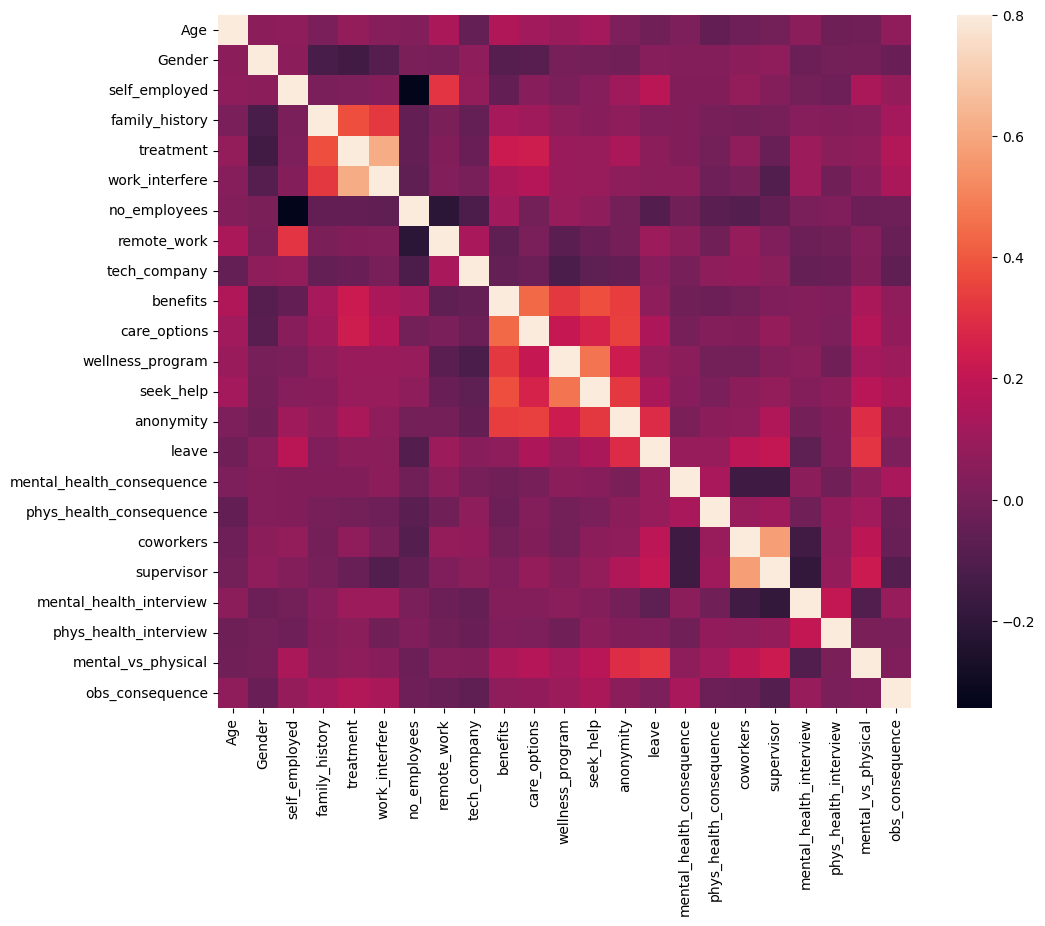

In [18]:

corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

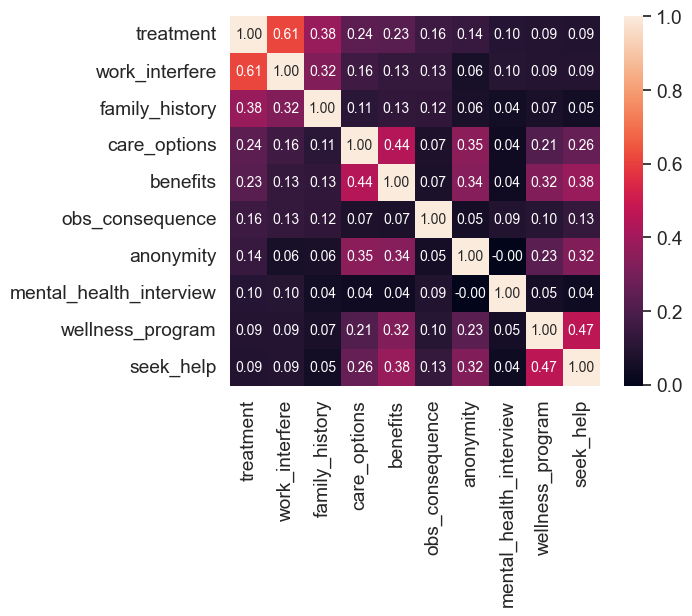

In [19]:

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Distribution** and density by Age

C:\Users\Anuj Bohra\AppData\Local\Temp\ipykernel_16696\3214571484.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)
C:\Users\Anuj Bohra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age')

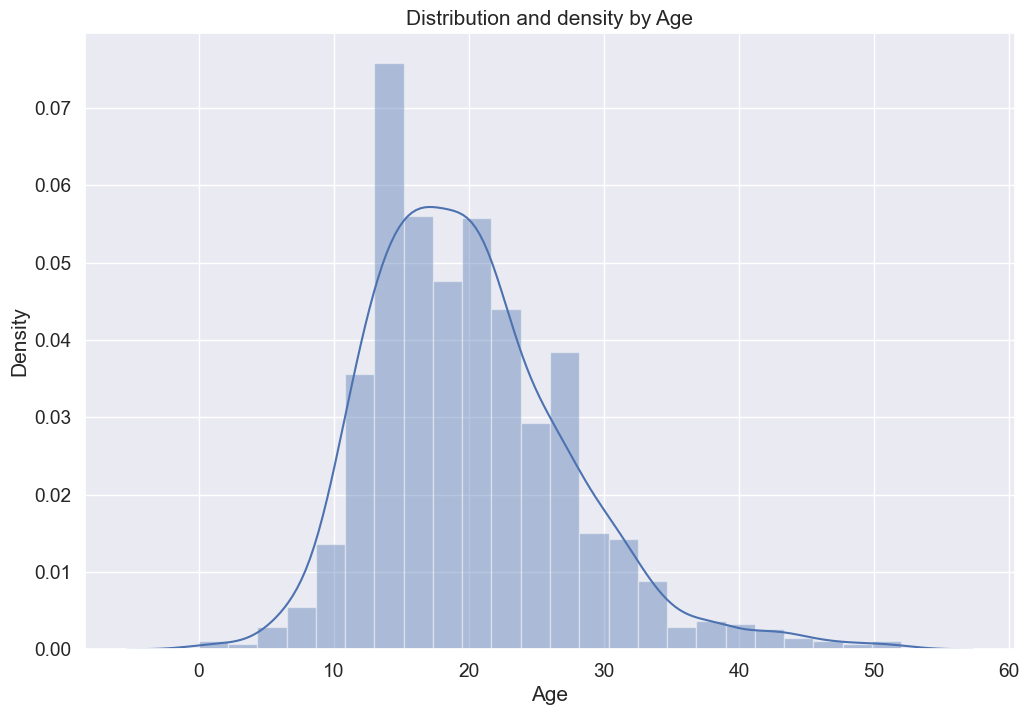

In [20]:

plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

Separate by treatment

C:\Users\Anuj Bohra\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Anuj Bohra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anuj Bohra\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your

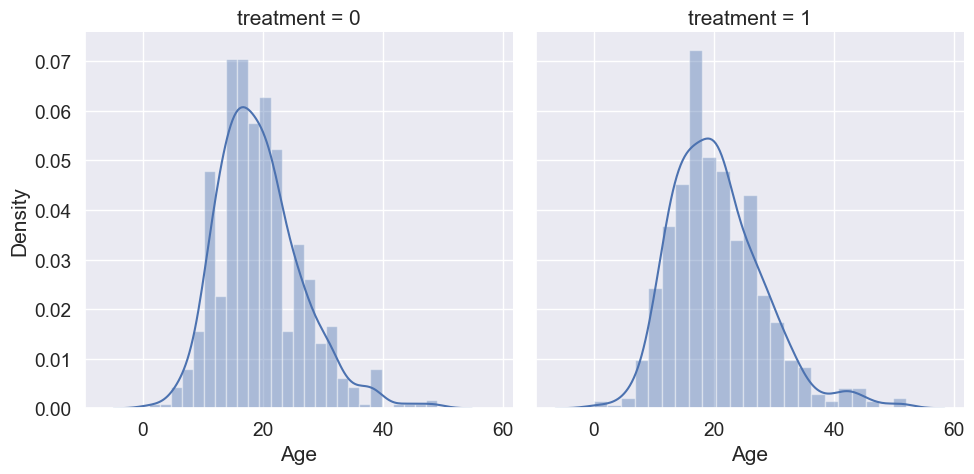

In [21]:
g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.distplot, "Age")


Scaling

In [22]:
# Scaling Age and emp
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df['no_employees'] = scaler.fit_transform(train_df[['no_employees']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.480769,0,0,0,1,2,0.8,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,0.615385,1,0,0,0,3,1.0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.384615,1,0,0,0,3,0.8,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,0.365385,1,0,1,1,2,0.4,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,0.365385,1,0,0,0,1,0.2,1,1,2,...,0,0,1,1,1,2,2,2,0,0


Spilitting Dataset

In [23]:
train_df.corr()


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.055635,0.066090,0.011804,0.077166,0.041459,0.032745,0.135369,-0.045669,0.150327,...,0.021048,-0.017323,0.019758,-0.049928,-0.018198,-0.005840,0.059668,-0.023607,-0.015770,0.067691
Gender,0.055635,1.000000,0.053744,-0.121346,-0.144482,-0.089137,0.015034,0.006104,0.063437,-0.088487,...,-0.013796,0.044375,0.038445,0.038179,0.056413,0.071025,-0.027376,-0.007040,-0.001849,-0.031586
self_employed,0.066090,0.053744,1.000000,0.009890,0.020493,0.035832,-0.344167,0.316533,0.080136,-0.050412,...,0.107915,0.179395,0.030552,0.028461,0.076252,0.037432,-0.006372,-0.020000,0.139845,0.081899
family_history,0.011804,-0.121346,0.009890,1.000000,0.377918,0.322290,-0.053635,0.014456,-0.046079,0.128490,...,0.063679,0.022631,0.028196,0.002832,-0.000847,0.003729,0.044564,0.039894,0.041089,0.124861
treatment,0.077166,-0.144482,0.020493,0.377918,1.000000,0.614879,-0.050114,0.026937,-0.031525,0.226140,...,0.142889,0.061549,0.030221,-0.008933,0.068433,-0.036199,0.098413,0.051859,0.062642,0.156972
work_interfere,0.041459,-0.089137,0.035832,0.322290,0.614879,1.000000,-0.061741,0.034725,0.005897,0.134127,...,0.063502,0.050352,0.060506,-0.020522,0.004070,-0.100000,0.098978,-0.017172,0.047200,0.134160
no_employees,0.032745,0.015034,-0.344167,-0.053635,-0.050114,-0.061741,1.000000,-0.211974,-0.111974,0.115136,...,-0.008690,-0.098076,-0.011370,-0.075015,-0.090275,-0.052650,0.012454,0.025892,-0.030942,-0.020812
remote_work,0.135369,0.006104,0.316533,0.014456,0.026937,0.034725,-0.211974,1.000000,0.131108,-0.061417,...,-0.002676,0.099669,0.054828,-0.009578,0.082438,0.025220,-0.029730,-0.014344,0.036591,-0.039065
tech_company,-0.045669,0.063437,0.080136,-0.046079,-0.031525,0.005897,-0.111974,0.131108,1.000000,-0.045619,...,-0.050912,0.047363,0.001336,0.066134,0.075383,0.049543,-0.041117,-0.032186,0.029191,-0.062347
benefits,0.150327,-0.088487,-0.050412,0.128490,0.226140,0.134127,0.115136,-0.061417,-0.045619,1.000000,...,0.337122,0.065898,-0.009723,-0.028050,-0.006250,0.026161,0.037621,0.025533,0.139742,0.069650


In [24]:
# define X and y
#based on corr with treatment(target)
feature_cols = ['Age', 'Gender', 'family_history', 'no_employees','benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']


X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

methodDict = {}
rmseDict = ()

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.791005291005291

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       188
           1       0.77      0.84      0.80       190

    accuracy                           0.79       378
   macro avg       0.79      0.79      0.79       378
weighted avg       0.79      0.79      0.79       378


Confusion Matrix:
 [[140  48]
 [ 31 159]]


In [26]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8068783068783069

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       188
           1       0.79      0.84      0.81       190

    accuracy                           0.81       378
   macro avg       0.81      0.81      0.81       378
weighted avg       0.81      0.81      0.81       378


Confusion Matrix:
 [[145  43]
 [ 30 160]]


In [27]:
pip install --upgrade scikit-learn



  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Rolling back uninstall of scikit-learn
  Moving to c:\users\anuj bohra\anaconda3\lib\site-packages\scikit_learn-1.2.2.dist-info\
   from C:\Users\Anuj Bohra\anaconda3\Lib\site-packages\~cikit_learn-1.2.2.dist-info
  Moving to c:\users\anuj bohra\anaconda3\lib\site-packages\sklearn\__check_build\__init__.py
   from C:\Users\Anuj Bohra\AppData\Local\Temp\pip-uninstall-t6_l_t4m\__init__.py
  Moving to c:\users\anuj bohra\anaconda3\lib\site-packages\sklearn\__check_build\__pycache__\
   from C:\Users\Anuj Bohra\anaconda3\Lib\site-packages\sklearn\__check_build\~_pycache__
  Moving to c:\users\anuj bohra\anaconda3\lib\site-packages\sklearn\__check_build\_check_build.cp311-

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Anuj Bohra\\anaconda3\\Lib\\site-packages\\sklearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [28]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
stack.fit(X_train, y_train)
# Predictions
y_pred = stack.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8015873015873016

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       188
           1       0.79      0.82      0.81       190

    accuracy                           0.80       378
   macro avg       0.80      0.80      0.80       378
weighted avg       0.80      0.80      0.80       378


Confusion Matrix:
 [[148  40]
 [ 35 155]]


In [29]:
# Define AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
# Train the model
adaboost_clf.fit(X_train, y_train)

# Predictions
y_pred = adaboost_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.79       188
           1       0.76      0.92      0.83       190

    accuracy                           0.81       378
   macro avg       0.82      0.81      0.81       378
weighted avg       0.82      0.81      0.81       378


Confusion Matrix:
 [[132  56]
 [ 16 174]]


In [30]:
import joblib
# Generate predictions with the best method i.e. adaboost 
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results.to_csv('treatment_results.csv', index=False)
results.head()

# Save the model
joblib.dump(clf, 'Boosting_model.pkl')
print("Model saved")

Model saved


In [31]:
# !pip install sklearn-porter

In [32]:
# !pip install --upgrade sklearn-porter

#Submission

In [34]:
import pickle
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X, y)

# Save the trained model to a file
with open('BoostingModel2.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [39]:
import joblib
# Generate predictions with the best method i.e. adaboost 
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)
dfTestPredictions = rf_clf.predict(X_test)
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results.to_csv('treatment_results_rf.csv', index=False)
results.head()

# Save the model
joblib.dump(rf_clf, 'RandomForest_model.pkl')
print("Model saved")

Model saved


In [35]:
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,986,1
4,186,0
...,...,...
373,1024,1
374,506,0
375,1069,0
376,1125,1


 99%|===================| 1746/1762 [00:59<00:00]        

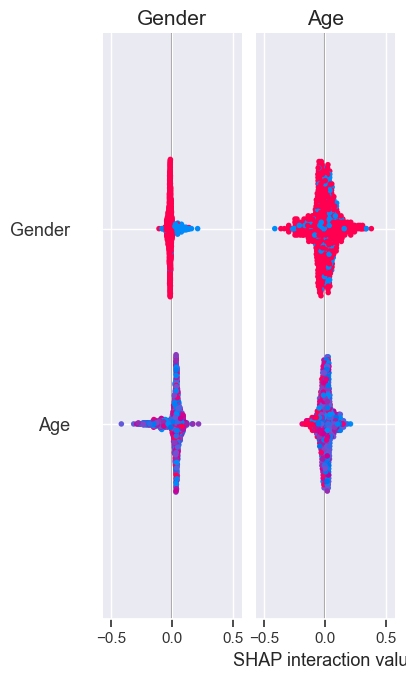

In [45]:
# Model Explanation
import shap
from sklearn.inspection import permutation_importance

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_clf, X_train)

# Calculate SHAP values for all instances
# Disable the additivity check if you want to ignore the warning
shap_values = explainer.shap_values(X_train, check_additivity=False)

# Visualize global feature importance using summary plot
shap.summary_plot(shap_values, X_train)


In [46]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

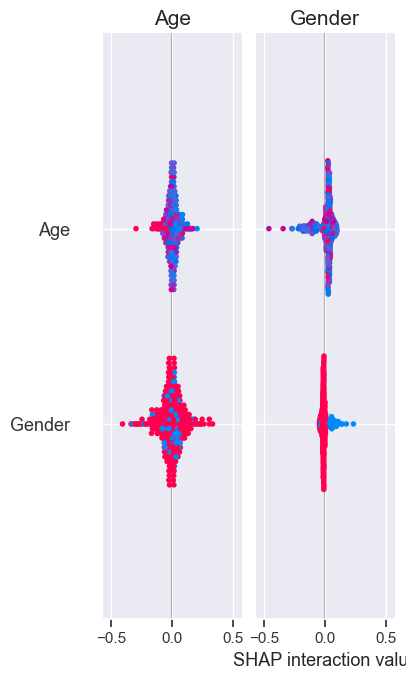

In [50]:
shap.summary_plot(shap_values, X_test)